# Global Power Plant Database

Problem Statement:

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

# Import necessary Python Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score,recall_score,precision_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import warnings
warnings.filterwarnings('ignore')

# DATA EXPLORATION

In [2]:
#loading the data set
df = pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
#print first 5 rows of the dataset
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
#Data Summary
df.shape

(907, 27)

In [4]:
# There are 907 rows and 27 columns present in the dataset.

In [5]:
# Checking null values
df.isnull().sum().sort_values(ascending=False)

estimated_generation_gwh    907
other_fuel3                 907
wepp_id                     907
generation_gwh_2013         907
generation_gwh_2019         907
other_fuel2                 906
other_fuel1                 709
owner                       565
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_data_source      458
year_of_capacity_data       388
commissioning_year          380
latitude                     46
longitude                    46
geolocation_source           19
country                       0
url                           0
country_long                  0
primary_fuel                  0
capacity_mw                   0
gppd_idnr                     0
name                          0
source                        0
dtype: int64

In [6]:
#There are null values present in many columns of the dataset.
#The features which have null value for all the rows shall be dropped
#let us first describe the entire list of features and their details
#we shall treat null values once we evaluate the value counts of each feature.

In [7]:
#find duplicates
df.duplicated().sum()

0

In [8]:
# there are no duplicates present in the dataset

In [9]:
#checing datatypes of each column
df.dtypes.sort_values(ascending=False)

country                      object
other_fuel1                  object
generation_data_source       object
geolocation_source           object
url                          object
country_long                 object
owner                        object
other_fuel2                  object
source                       object
primary_fuel                 object
name                         object
gppd_idnr                    object
generation_gwh_2014         float64
generation_gwh_2019         float64
generation_gwh_2018         float64
generation_gwh_2017         float64
generation_gwh_2016         float64
generation_gwh_2015         float64
generation_gwh_2013         float64
other_fuel3                 float64
year_of_capacity_data       float64
wepp_id                     float64
capacity_mw                 float64
latitude                    float64
longitude                   float64
commissioning_year          float64
estimated_generation_gwh    float64
dtype: object

In [10]:
for i in df.columns:
    print("*******************************************************")
    print("Value counts of", i, "\n" )
    print(df[i].value_counts())
    print('*******************************************************')

*******************************************************
Value counts of country 

IND    907
Name: country, dtype: int64
*******************************************************
*******************************************************
Value counts of country_long 

India    907
Name: country_long, dtype: int64
*******************************************************
*******************************************************
Value counts of name 

Belgaum Gadag Wind Farm    1
F_BAD CCGT                 1
KOSI                       1
LIKIM RO                   1
SAGARDIGHI TPP             1
                          ..
VIJESWARAM GT              1
PAPANASAM                  1
NMDC Anehalu Wind Farm     1
KHOPOLI                    1
NIMOO BAZGO                1
Name: name, Length: 907, dtype: int64
*******************************************************
*******************************************************
Value counts of gppd_idnr 

WRI1020013    1
IND0000356    1
IND0000181    1
IND0000424

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

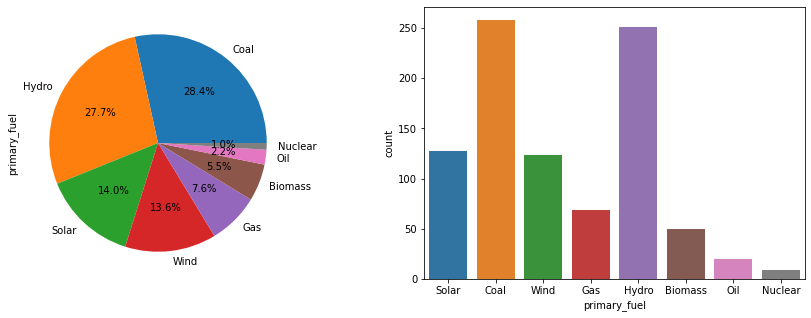

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['primary_fuel'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['primary_fuel'])
df['primary_fuel'].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

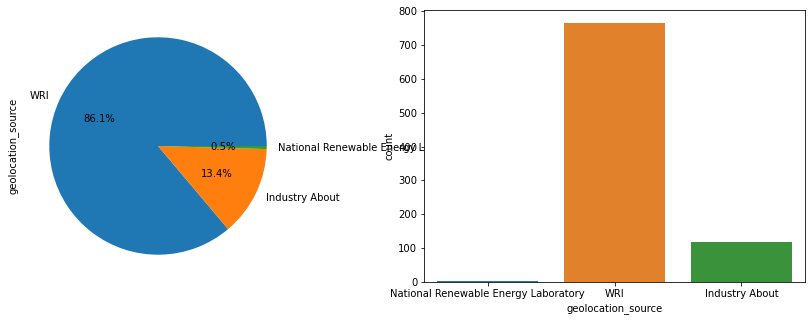

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['geolocation_source'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['geolocation_source'])
df['geolocation_source'].value_counts()

# OBSERVATIONS FROM VALUE_COUNTS :

# CLEANING THE DATASET

1) DROPPING COLUMNS

- DROPPING EMPTY COLUMNS

In [13]:
#we will drop the above mentioned features including other_fuel2 which has 906 null entries.

In [14]:
df.drop(columns=['estimated_generation_gwh','other_fuel3', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019', 'other_fuel2'], inplace=True)

In [15]:
df.shape

(907, 21)

In [16]:
#We have dropped 6 columns.

- DROPPING NON-IMPORTANT COLUMNS

In [17]:
df.isnull().sum().sort_values(ascending=False)

other_fuel1               709
owner                     565
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
year_of_capacity_data     388
commissioning_year        380
longitude                  46
latitude                   46
geolocation_source         19
primary_fuel                0
country_long                0
source                      0
url                         0
capacity_mw                 0
gppd_idnr                   0
name                        0
country                     0
dtype: int64

1) Country (identifier) : all the entries are the same IND; we will drop the column. 

2) Country_long (identifier) : all the entries are the same India; we will drop this column as well. 

3) name (identifier) : this is just an identifier, we will drop this column as well. 

4) gppd_idnr (identifier) : this is just an identifier, we will drop this column as well. 

5) owner (owner will not add value in prediction) : the owner of the powerplant will not add any value in the prediction, we will drop this column. 

6) source (source will not add value in prediction) : this feature describes the entity who has reported the data, it has nothing to do with the prediction of the target column. Hence, we shall drop this column as well. 

7) url (url will not add any value in prediction) : this feature describes the url of the source who reported the data, it has nothing to do with the prediction of the target column. Hence, we shall drop this column as well.

8) year_of_capacity_data (388 null entries) : all the non null entries were reported in the year 2019. we can drop this column, as this will not make any difference in the prediction.

9) generation_data_source (458 null entries) : Central Electricity Authority has reported the above information for all non-null entries. we can drop this column, as this will not make any difference in the prediction.

10) geolocation_source (19 null entries) : Because this feature describe the source of information for the geolocation for all non-null entries. we can drop this column, as this will not make any difference in the prediction.

In [18]:
df.drop(columns=['country', 'country_long', 'name', 'gppd_idnr', 'owner', 'source', 'url', 'year_of_capacity_data', 'generation_data_source', 'geolocation_source'], inplace=True)

In [19]:
df.shape

(907, 11)

In [20]:
#We have dropped another 10 columns, in total we have dropped 16 columns from initial 27 columns.

In [21]:
df.isnull().sum().sort_values(ascending=False)


other_fuel1            709
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
commissioning_year     380
latitude                46
longitude               46
capacity_mw              0
primary_fuel             0
dtype: int64

# Treating Null values

In [22]:
#As per the comissioning_year column, 
#if the commissioning year of a power plant is above that year then there was no power generation in that year 
#because that plant was not setup by then.

#Hence, we will first replace NaN values with 0 for those entries whose commissioning year was greater to that year of 
#the column generation_gwh_YEAR.

In [23]:
index = df.index.values

In [24]:
for i in index:
     if df['commissioning_year'].loc[i]>2014:
            if df['commissioning_year'].loc[i]==2015:
                df['generation_gwh_2014'].loc[i]=0
            if df['commissioning_year'].loc[i]==2016:
                df['generation_gwh_2014'].loc[i]=0
                df['generation_gwh_2015'].loc[i]=0
            if df['commissioning_year'].loc[i]==2017:
                df['generation_gwh_2014'].loc[i]=0
                df['generation_gwh_2015'].loc[i]=0
                df['generation_gwh_2016'].loc[i]=0
            if df['commissioning_year'].loc[i]==2018:
                df['generation_gwh_2014'].loc[i]=0
                df['generation_gwh_2015'].loc[i]=0
                df['generation_gwh_2016'].loc[i]=0
                df['generation_gwh_2017'].loc[i]=0
            if df['commissioning_year'].loc[i]==2019:
                df['generation_gwh_2014'].loc[i]=0
                df['generation_gwh_2015'].loc[i]=0
                df['generation_gwh_2016'].loc[i]=0
                df['generation_gwh_2017'].loc[i]=0
                df['generation_gwh_2018'].loc[i]=0

In [25]:
df.isnull().sum().sort_values(ascending=False)

other_fuel1            709
generation_gwh_2017    465
generation_gwh_2014    459
generation_gwh_2018    459
generation_gwh_2015    458
generation_gwh_2016    458
commissioning_year     380
latitude                46
longitude               46
capacity_mw              0
primary_fuel             0
dtype: int64

In [26]:
#Even after replacing the null values with 0 as per their commissioning year, we still have many null values left.
#That is because there are 380 entries with null entries for the commisioning year itself.
#We can see a lot of null entries for electricity generation data for the years 2014-2018.
# Hence, we shall treat first find out how many rows have null entries for all of these columns.

In [27]:
df[df['generation_gwh_2018'].isnull() & df['generation_gwh_2017'].isnull() & df['generation_gwh_2016'].isnull() & df['generation_gwh_2015'].isnull() & df['generation_gwh_2014'].isnull()]

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.50,28.1839,73.2407,Solar,NaN,2011.0,NaN,NaN,NaN,NaN,NaN
1,98.00,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.20,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,16.95,31.2412,77.8769,Hydro,NaN,1986.0,NaN,NaN,NaN,NaN,NaN
14,9.00,NaN,NaN,Hydro,NaN,1987.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
900,16.00,17.1653,74.2456,Biomass,NaN,NaN,NaN,NaN,NaN,NaN,NaN
903,3.00,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.50,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.00,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#There are 457 rows where all the columns have null values, hence there is no point in filling null values for any of these rows
#To avoid adding arbitary values for the above rows, we shall drop them

In [29]:
df.drop(df.index[df['generation_gwh_2018'].isnull() & df['generation_gwh_2017'].isnull() & df['generation_gwh_2016'].isnull() & df['generation_gwh_2015'].isnull() & df['generation_gwh_2014'].isnull()], inplace=True)

In [30]:
df.shape

(450, 11)

In [31]:
#We have dropped 457 rows out of 907 rows, which is a data loss of 50.50%
#almost 50% of the data had no values for the electricity generated in the entire year cycle of 2013-2019.
#whereas, the feature of electrictity generation is the most important to predict our target columns.

In [32]:
df.isnull().sum().sort_values(ascending=False)

other_fuel1            252
latitude                13
longitude               13
generation_gwh_2017      8
generation_gwh_2014      2
generation_gwh_2018      2
generation_gwh_2015      1
generation_gwh_2016      1
capacity_mw              0
primary_fuel             0
commissioning_year       0
dtype: int64

In [33]:
#as we can see the secondary fuel of 198 power plants as Oil, this becomes a very important feature 
#and hence rather than dropping it, we will replace the NaN values to 'N', which denotes the secondary fuel as nothing for others

In [34]:
df['other_fuel1'].fillna('N',inplace=True )

In [35]:
df.isnull().sum().sort_values(ascending=False)

latitude               13
longitude              13
generation_gwh_2017     8
generation_gwh_2014     2
generation_gwh_2018     2
generation_gwh_2015     1
generation_gwh_2016     1
capacity_mw             0
primary_fuel            0
other_fuel1             0
commissioning_year      0
dtype: int64

In [36]:
#Hence, we have succesfully converted the missing values of other_fuel1 to 0; we shall later encode Oil to 1.
#Now, lets impute the missing values of the electricity generation year wise features

In [37]:
#Impute Missing Values

In [38]:
df[df['generation_gwh_2018'].isnull()]

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
25,50.0,NaN,NaN,Solar,N,2015.0,0.0,NaN,NaN,NaN,NaN
747,25.0,22.3005,82.7047,Coal,Oil,2015.0,0.0,0.0,0.0,NaN,NaN


In [39]:
#In these 2 rows, there was no electricity production in the years of 2014 and 2014,2015,2016
#We won't be able to impute any value as per their historical data, as this would be unfair to do so with 0 production in previous years.
#Hence we will drop this row as well.

In [40]:
df.drop(df.index[df['generation_gwh_2018'].isnull()], inplace=True)

In [41]:
df.shape

(448, 11)

In [42]:
df[df['generation_gwh_2017'].isnull()]

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
358,445.0,16.7346,81.8622,Gas,N,2009.0,0.000000,0.000000,0.000000,NaN,0.0
646,48.0,15.3771,73.8770,Gas,N,1999.0,12.214000,0.000000,0.000000,NaN,0.0
684,105.7,12.2995,78.4038,Oil,N,2001.0,223.650436,37.560643,0.000000,NaN,0.0
685,106.0,9.9751,78.0445,Oil,N,2001.0,243.634000,39.954000,11.308044,NaN,0.0
817,150.0,19.0004,72.8983,Oil,Gas,1965.0,0.000000,0.000000,0.000000,NaN,0.0
901,106.6,13.1156,77.5838,Oil,N,1993.0,0.000000,0.000000,0.000000,NaN,0.0


In [43]:
#In various results we have observed that there are rows with NaN & 0 values both; for which imputing the values will be unfair.
#As there is no historical data to support our imputation. 
#We will now remove those rows who have values as 0 & NaN.

In [44]:
df3= pd.DataFrame()

In [45]:
#We will create a new dataframe with replacing the NaN values to 0.
#We will then search for rows will all the values of power generation as 0 and drop them

In [46]:
df3['generation_gwh_2014'] = df['generation_gwh_2014'].fillna(0)
df3['generation_gwh_2015'] = df['generation_gwh_2015'].fillna(0)
df3['generation_gwh_2016'] = df['generation_gwh_2016'].fillna(0)
df3['generation_gwh_2017'] = df['generation_gwh_2017'].fillna(0)
df3['generation_gwh_2018'] = df['generation_gwh_2018'].fillna(0)

In [47]:
location=(df3==0).all(axis=1)

In [48]:
location

3      False
4      False
5      False
6      False
7      False
       ...  
890    False
893    False
899    False
901     True
902    False
Length: 448, dtype: bool

In [49]:
locs = df[location].index.values

In [50]:
locs

array([ 72, 160, 204, 214, 224, 277, 332, 358, 420, 435, 477, 525, 569,
       650, 791, 817, 901], dtype=int64)

In [51]:
#searching these rows in df dataframe will give a result with rows with NaN & 0 under power generation features.
df.loc[locs]

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
72,25.2,NaN,NaN,Oil,N,2000.0,0.0,0.0,0.0,0.0,0.0
160,100.0,24.8747,75.6189,Nuclear,N,1972.0,NaN,0.0,0.0,0.0,0.0
204,515.0,21.1110,72.6550,Gas,N,1995.0,0.0,0.0,0.0,0.0,0.0
214,800.0,22.8618,78.8648,Coal,Oil,2018.0,0.0,0.0,0.0,0.0,0.0
224,120.0,19.9324,79.1040,Coal,Oil,2012.0,0.0,0.0,0.0,0.0,0.0
277,350.0,21.6580,83.9200,Coal,Oil,2016.0,0.0,0.0,0.0,0.0,0.0
332,35.0,NaN,NaN,Coal,Oil,2012.0,0.0,0.0,0.0,0.0,0.0
358,445.0,16.7346,81.8622,Gas,N,2009.0,0.0,0.0,0.0,NaN,0.0
420,36.0,NaN,NaN,Oil,N,1999.0,0.0,0.0,0.0,0.0,0.0
435,36.8,NaN,NaN,Oil,N,2000.0,0.0,0.0,0.0,0.0,0.0


In [52]:
#as per above, there are either rows with 0 electricity generation or with a historical data of 0 to fill in the NaN values.
#this does not make any sense, as the power plants with capacities above 100 gwh and established since 2000 year does not generate any power.
#according to me, these data points are misleading and hence we will drop them as well. 

In [53]:
df.drop([72, 160, 204, 214, 224, 277, 332, 358, 420, 435, 477, 525, 569, 650, 791, 817, 901], inplace=True)

In [54]:
df.shape

(431, 11)

In [55]:
df.reset_index(inplace = True)

In [56]:
df.isnull().sum().sort_values(ascending=False)

latitude               8
longitude              8
generation_gwh_2017    3
generation_gwh_2014    1
index                  0
capacity_mw            0
primary_fuel           0
other_fuel1            0
commissioning_year     0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2018    0
dtype: int64

In [57]:
#for the NaN values we will make use of imputation technique

# IMPUTATION

In [58]:
df[df['generation_gwh_2014'].isnull()]

,index,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
404,850,382.5,21.3411,72.9895,Gas,N,2012.0,NaN,834.058,0.0,0.0,0.0


In [59]:
df[df['generation_gwh_2017'].isnull()]

,index,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
311,646,48.0,15.3771,73.8770,Gas,N,1999.0,12.214000,0.000000,0.000000,NaN,0.0
328,684,105.7,12.2995,78.4038,Oil,N,2001.0,223.650436,37.560643,0.000000,NaN,0.0
329,685,106.0,9.9751,78.0445,Oil,N,2001.0,243.634000,39.954000,11.308044,NaN,0.0


In [60]:
df[df['latitude'].isnull()]

,index,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
17,42,450.0,NaN,NaN,Hydro,N,2015.0,0.00,55.3220,1750.18510,1812.84025,1848.620450
20,45,600.0,NaN,NaN,Coal,Oil,2015.0,0.00,1437.9547,2800.00000,2120.68000,2553.000000
150,329,195.0,NaN,NaN,Hydro,N,2016.0,0.00,0.0000,55.80955,196.14435,117.648800
151,330,225.0,NaN,NaN,Gas,N,2016.0,0.00,0.0000,462.28260,1312.40000,815.984131
216,466,90.0,NaN,NaN,Coal,Oil,2011.0,473.91,281.7300,378.68000,150.95200,126.494100
252,540,45.0,NaN,NaN,Coal,Oil,2013.0,298.28,124.9248,208.78880,77.33440,68.094400
324,680,100.0,NaN,NaN,Hydro,N,2017.0,0.00,0.0000,0.00000,134.31505,406.765950
343,711,150.0,NaN,NaN,Coal,Oil,2017.0,0.00,0.0000,0.00000,4.31340,0.000000


In [61]:
df[df['longitude'].isnull()]

,index,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
17,42,450.0,NaN,NaN,Hydro,N,2015.0,0.00,55.3220,1750.18510,1812.84025,1848.620450
20,45,600.0,NaN,NaN,Coal,Oil,2015.0,0.00,1437.9547,2800.00000,2120.68000,2553.000000
150,329,195.0,NaN,NaN,Hydro,N,2016.0,0.00,0.0000,55.80955,196.14435,117.648800
151,330,225.0,NaN,NaN,Gas,N,2016.0,0.00,0.0000,462.28260,1312.40000,815.984131
216,466,90.0,NaN,NaN,Coal,Oil,2011.0,473.91,281.7300,378.68000,150.95200,126.494100
252,540,45.0,NaN,NaN,Coal,Oil,2013.0,298.28,124.9248,208.78880,77.33440,68.094400
324,680,100.0,NaN,NaN,Hydro,N,2017.0,0.00,0.0000,0.00000,134.31505,406.765950
343,711,150.0,NaN,NaN,Coal,Oil,2017.0,0.00,0.0000,0.00000,4.31340,0.000000


In [62]:
#KNN IMPUTER
from sklearn.impute import KNNImputer
knnimp = KNNImputer(n_neighbors=3)
knn_imp = pd.DataFrame(knnimp.fit_transform(df[['generation_gwh_2014','generation_gwh_2017','latitude','longitude']]))

In [63]:
knn_imp

,0,1,2,3
0,617.789264,663.774500,23.8712,91.3602
1,0.000000,5385.579736,21.9603,82.4091
2,1153.421000,1147.913000,23.7689,68.6447
3,157.558250,89.629600,10.4547,77.0078
4,674.391100,679.594950,32.2258,77.2070
...,...,...,...,...
426,6753.870000,7018.217000,22.8725,73.3588
427,1045.820000,999.170000,20.2727,78.9792
428,184.453100,175.866250,30.3033,77.5684
429,3194.359820,3156.053669,30.1081,77.3257


In [64]:
knn_imp.isnull().sum().sort_values(ascending=False)

0    0
1    0
2    0
3    0
dtype: int64

In [65]:
df['generation_gwh_2014'] = knn_imp[0]
df['generation_gwh_2017']=knn_imp[1]
df['latitude']=knn_imp[2]
df['longitude']=knn_imp[3]

In [66]:
df

,index,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,3,135.0,23.8712,91.3602,Gas,N,2004.0,617.789264,843.7470,886.004428,663.774500,626.239128
1,4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,0.000000,5916.3700,6243.000000,5385.579736,7279.000000
2,5,250.0,23.7689,68.6447,Coal,Oil,2005.0,1153.421000,1208.8520,1175.765000,1147.913000,976.655000
3,6,60.0,10.4547,77.0078,Hydro,N,1970.0,157.558250,152.1952,61.421350,89.629600,48.327150
4,7,192.0,32.2258,77.2070,Hydro,N,2010.0,674.391100,721.3352,675.724400,679.594950,579.318850
...,...,...,...,...,...,...,...,...,...,...,...,...
426,889,1470.0,22.8725,73.3588,Coal,Oil,1986.0,6753.870000,5161.5380,3539.630000,7018.217000,7582.300000
427,890,540.0,20.2727,78.9792,Coal,Oil,2010.0,1045.820000,1651.1589,1229.480000,999.170000,940.390000
428,893,62.4,30.3033,77.5684,Hydro,N,1991.0,184.453100,183.0000,204.253600,175.866250,236.491600
429,899,600.0,30.1081,77.3257,Coal,Oil,2007.0,3194.359820,3709.5522,3123.572061,3156.053669,3039.661180


In [67]:
df.drop(columns='index', inplace=True)

In [68]:
df.isnull().sum().sort_values(ascending=False)

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [69]:
df.loc[404]

capacity_mw                  382.5
latitude                   21.3411
longitude                  72.9895
primary_fuel                   Gas
other_fuel1                      N
commissioning_year          2012.0
generation_gwh_2014    1308.393333
generation_gwh_2015        834.058
generation_gwh_2016            0.0
generation_gwh_2017            0.0
generation_gwh_2018            0.0
Name: 404, dtype: object

In [70]:
#checking datatypes of each column
df.dtypes.sort_values(ascending=False)

primary_fuel            object
other_fuel1             object
capacity_mw            float64
latitude               float64
longitude              float64
commissioning_year     float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [71]:
df['primary_fuel'].value_counts()

Hydro      183
Coal       182
Gas         54
Nuclear      7
Oil          5
Name: primary_fuel, dtype: int64

In [72]:
df['other_fuel1'].value_counts()

N               241
Oil             188
Cogeneration      1
Gas               1
Name: other_fuel1, dtype: int64

# ENCODING

In [73]:
#Let's encode the object data type features into integer data types.

In [74]:
from sklearn.preprocessing import OrdinalEncoder
o=OrdinalEncoder()
df['primary_fuel']=o.fit_transform(df['primary_fuel'].values.reshape(-1,1))
df['other_fuel1']=o.fit_transform(df['other_fuel1'].values.reshape(-1,1))

In [75]:
df['primary_fuel'].value_counts()

2.0    183
0.0    182
1.0     54
3.0      7
4.0      5
Name: primary_fuel, dtype: int64

In [76]:
df['other_fuel1'].value_counts()

2.0    241
3.0    188
0.0      1
1.0      1
Name: other_fuel1, dtype: int64

In [77]:
#checing datatypes of each column
df.dtypes.sort_values(ascending=False)

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel           float64
other_fuel1            float64
commissioning_year     float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [78]:
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000
mean,636.313633,21.717625,79.572485,1.069606,2.429234,1998.250580,2210.410923,2364.784323,2479.965179,2599.073497,2703.388019
std,728.261277,6.628880,5.164275,1.006851,0.513971,16.756737,3929.214908,4167.594076,4174.640000,4225.161602,4367.641512
min,26.000000,8.169100,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110.000000,16.802000,76.344450,0.000000,2.000000,1989.000000,126.996850,154.866775,186.828335,188.438075,230.093750
50%,394.000000,22.325600,78.408900,1.000000,2.000000,2002.000000,574.264250,666.941000,737.364650,833.551300,905.241050
75%,1000.000000,26.360000,82.478750,2.000000,3.000000,2012.000000,2687.823925,2973.537600,3296.753400,3329.651500,3229.468205
max,4760.000000,34.649000,95.408000,4.000000,3.000000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


# TARGET-1 => PRIMARY FUEL

<AxesSubplot:>

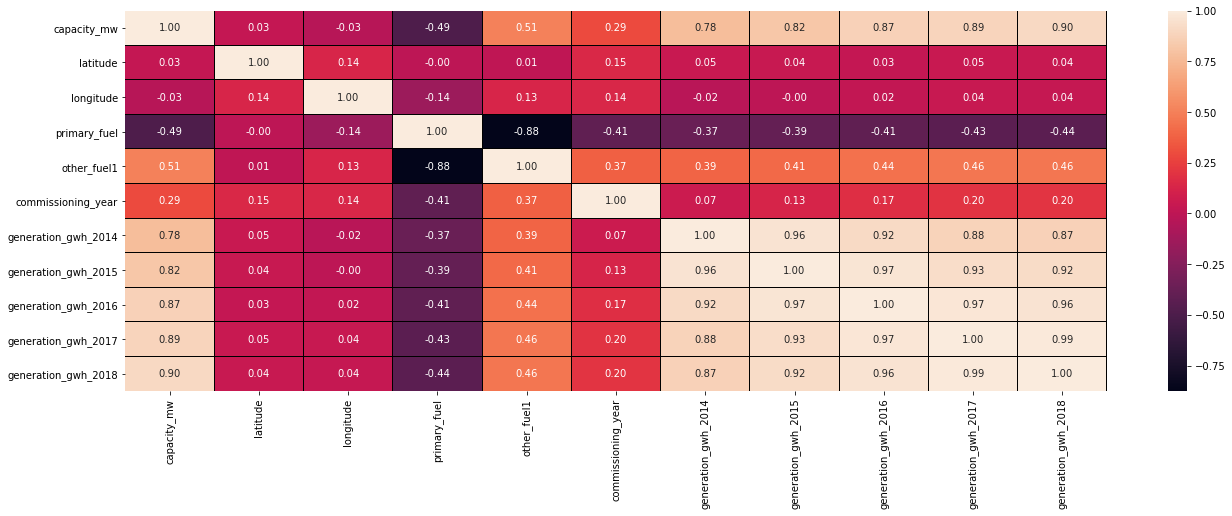

In [79]:
#Correlation using HEATMAP
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

In [80]:
#There seems to be correlation between the generation_gwh features, but all these features seems to be important for prediction of the target.

In [81]:
#Correlation with the target column
corr_mat=np.abs(df.corr())
corr_mat['primary_fuel'].sort_values(ascending=False)

primary_fuel           1.000000
other_fuel1            0.875766
capacity_mw            0.492296
generation_gwh_2018    0.436034
generation_gwh_2017    0.432695
generation_gwh_2016    0.414121
commissioning_year     0.410285
generation_gwh_2015    0.387169
generation_gwh_2014    0.365719
longitude              0.144101
latitude               0.003448
Name: primary_fuel, dtype: float64

In [82]:
#There is high correlation with other_fuel1 with primary_fuel, as mentioned, other fuel is an important factor to predict the primary fuel.

# DIVIDE DATA INTO FEATURES & LABEL

In [83]:
#dividing the columns in feature and label
X = df.drop(columns=['primary_fuel'])
y = df['primary_fuel']

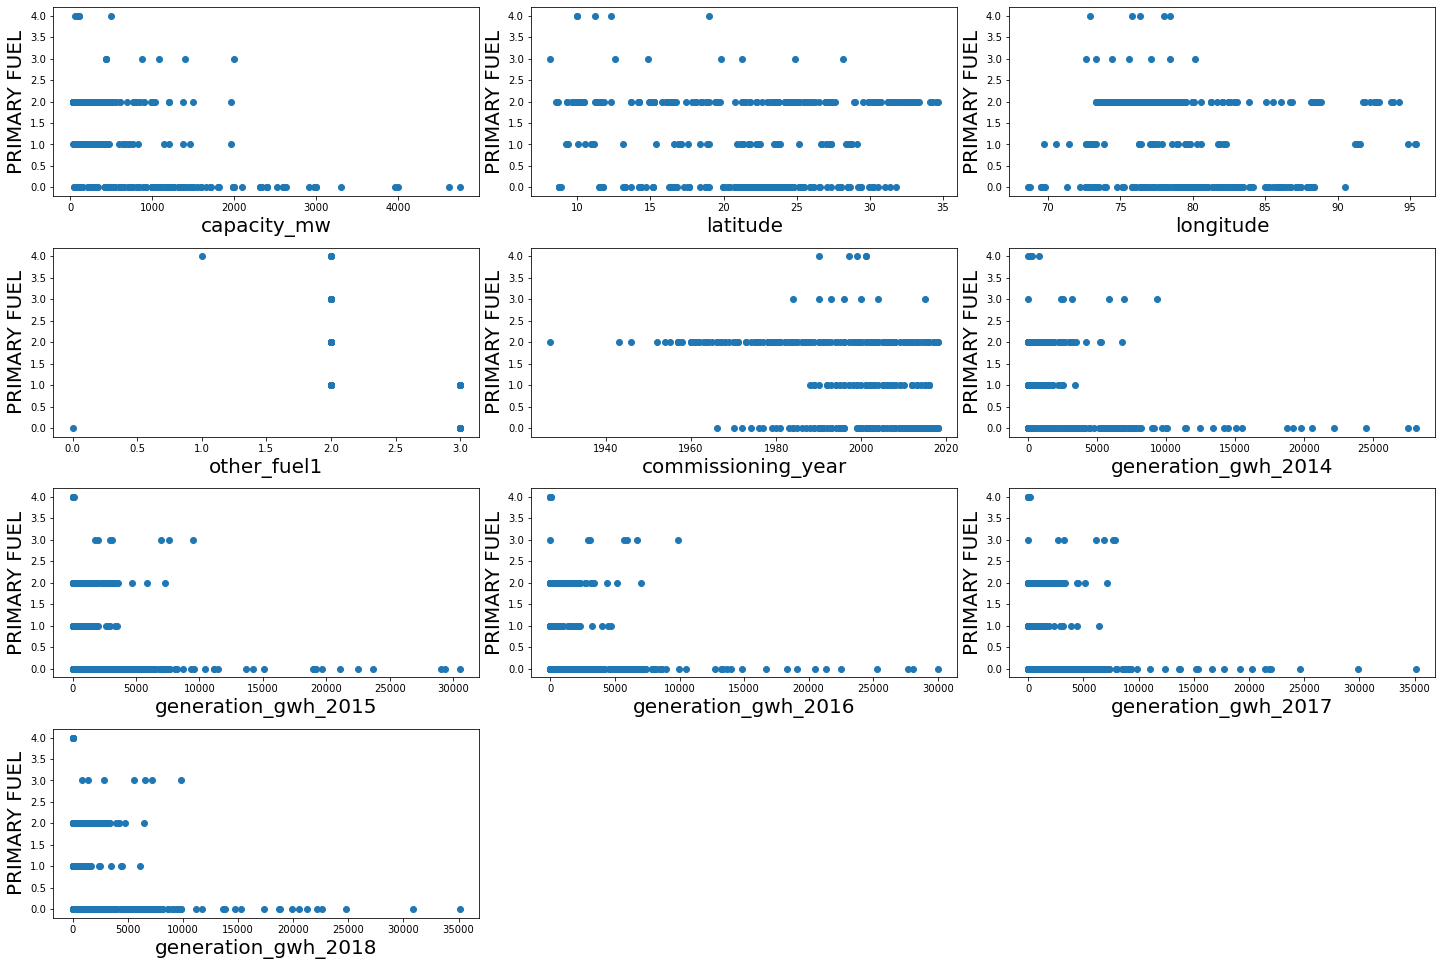

In [84]:
#Visualizing relatinship between feature and label (SCATTER PLOT)

plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=30: 
        ax=plt.subplot(10,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('PRIMARY FUEL', fontsize=20)
        plotnumber+=1
plt.tight_layout()

# OBSERVATIONS - FEATURE VS LABEL RELATION

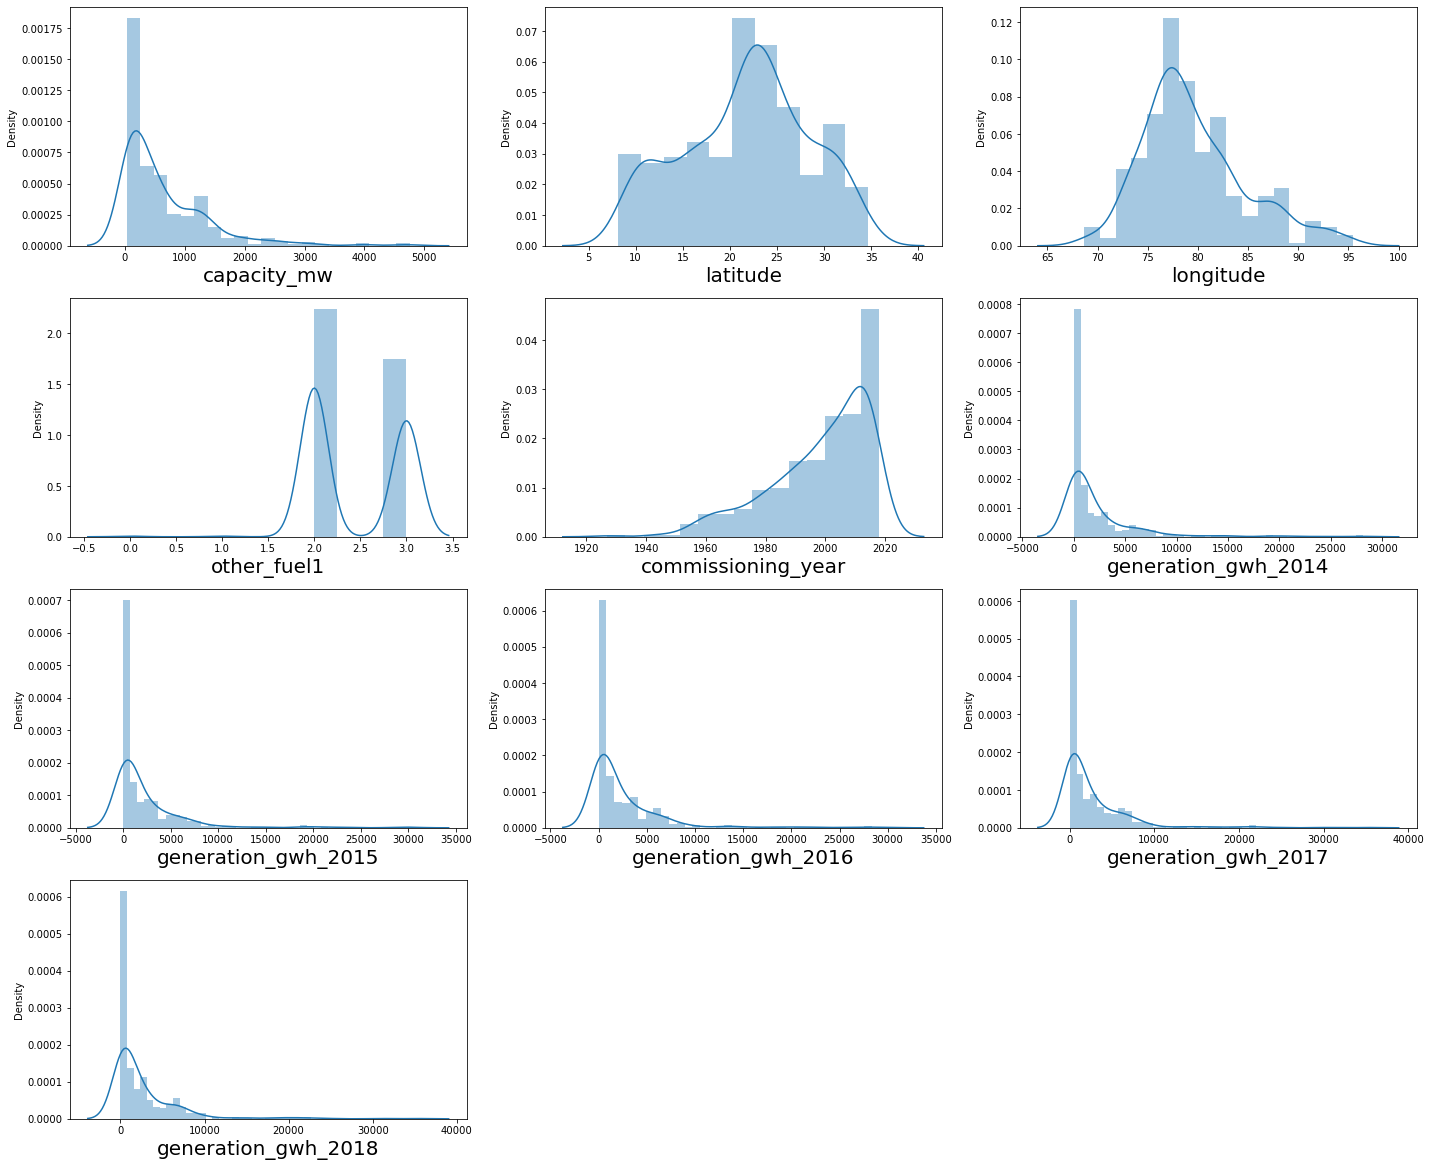

In [85]:
#Visualise the distribution of data in the feature columns(DISTRIBUTION PLOT)

plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in X:
    if plotnumber<=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# OBSERVATIONS - FEATURE DISTRIBUTION

# REMOVING SKEWNESS & OUTLIERS FROM THE DATASET

In [86]:
#Checking skewness of the features
X.skew().sort_values(ascending=False)

generation_gwh_2015    3.699520
generation_gwh_2017    3.536449
generation_gwh_2016    3.499128
generation_gwh_2014    3.467661
generation_gwh_2018    3.422547
capacity_mw            2.189084
longitude              0.814927
other_fuel1           -0.023353
latitude              -0.186236
commissioning_year    -1.065389
dtype: float64

In [87]:
#all the 5 generation features are highly skewed along with capacity_mw

In [88]:
#We can see skewness in few of our columns, we will remove the skewness using power_transform function
from sklearn.preprocessing import power_transform
X_new = power_transform(X)
X=pd.DataFrame(X_new,columns=X.columns)
X.skew().sort_values(ascending=False) #validating that the skewness is removed

longitude              0.013035
other_fuel1           -0.011306
capacity_mw           -0.033840
generation_gwh_2018   -0.059115
generation_gwh_2017   -0.073433
generation_gwh_2016   -0.092086
latitude              -0.111293
generation_gwh_2015   -0.117601
generation_gwh_2014   -0.163368
commissioning_year    -0.395531
dtype: float64

In [89]:
#succesfully removed skewness from all the features.

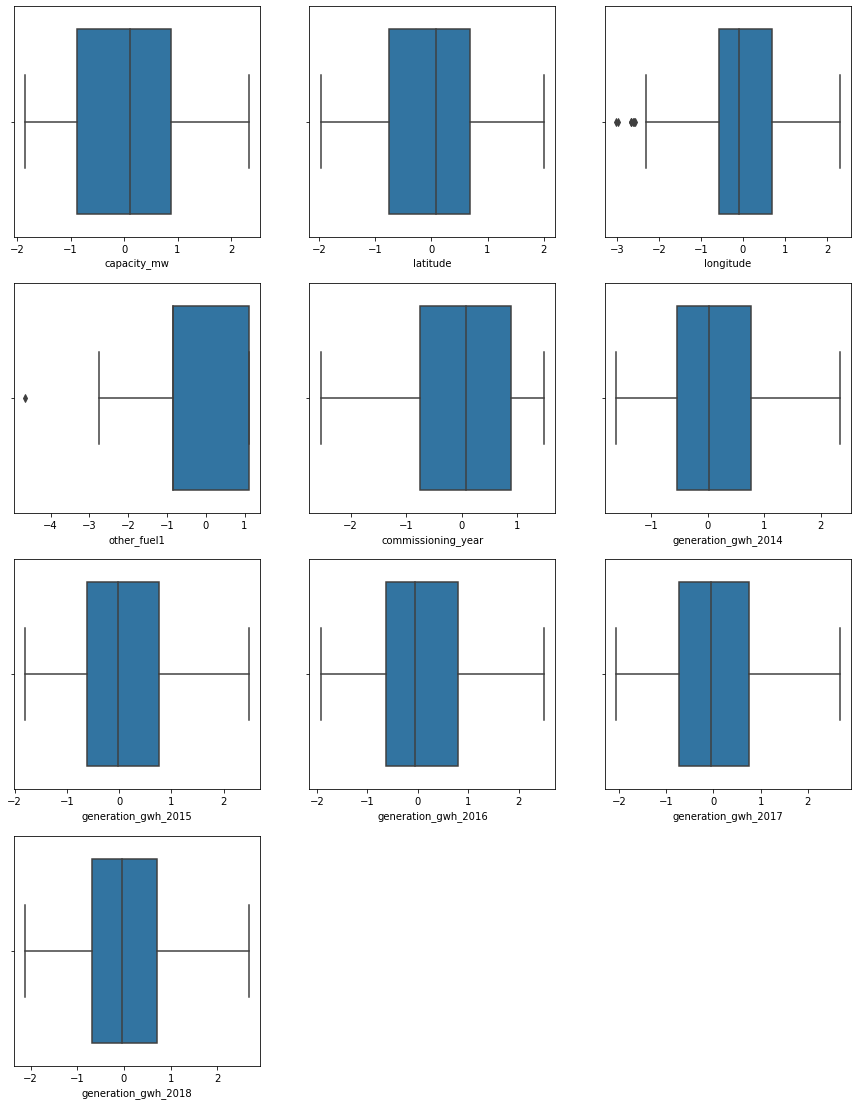

In [90]:
#Visualizing the outliers using BOXPLOT

plt.figure(figsize=(15,50))
graph=1

for column in X:
    if graph<=30: 
        ax=plt.subplot(10,3,graph)
        sns.boxplot(X[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [91]:
#negligible amount of outlier observed in the boxplot

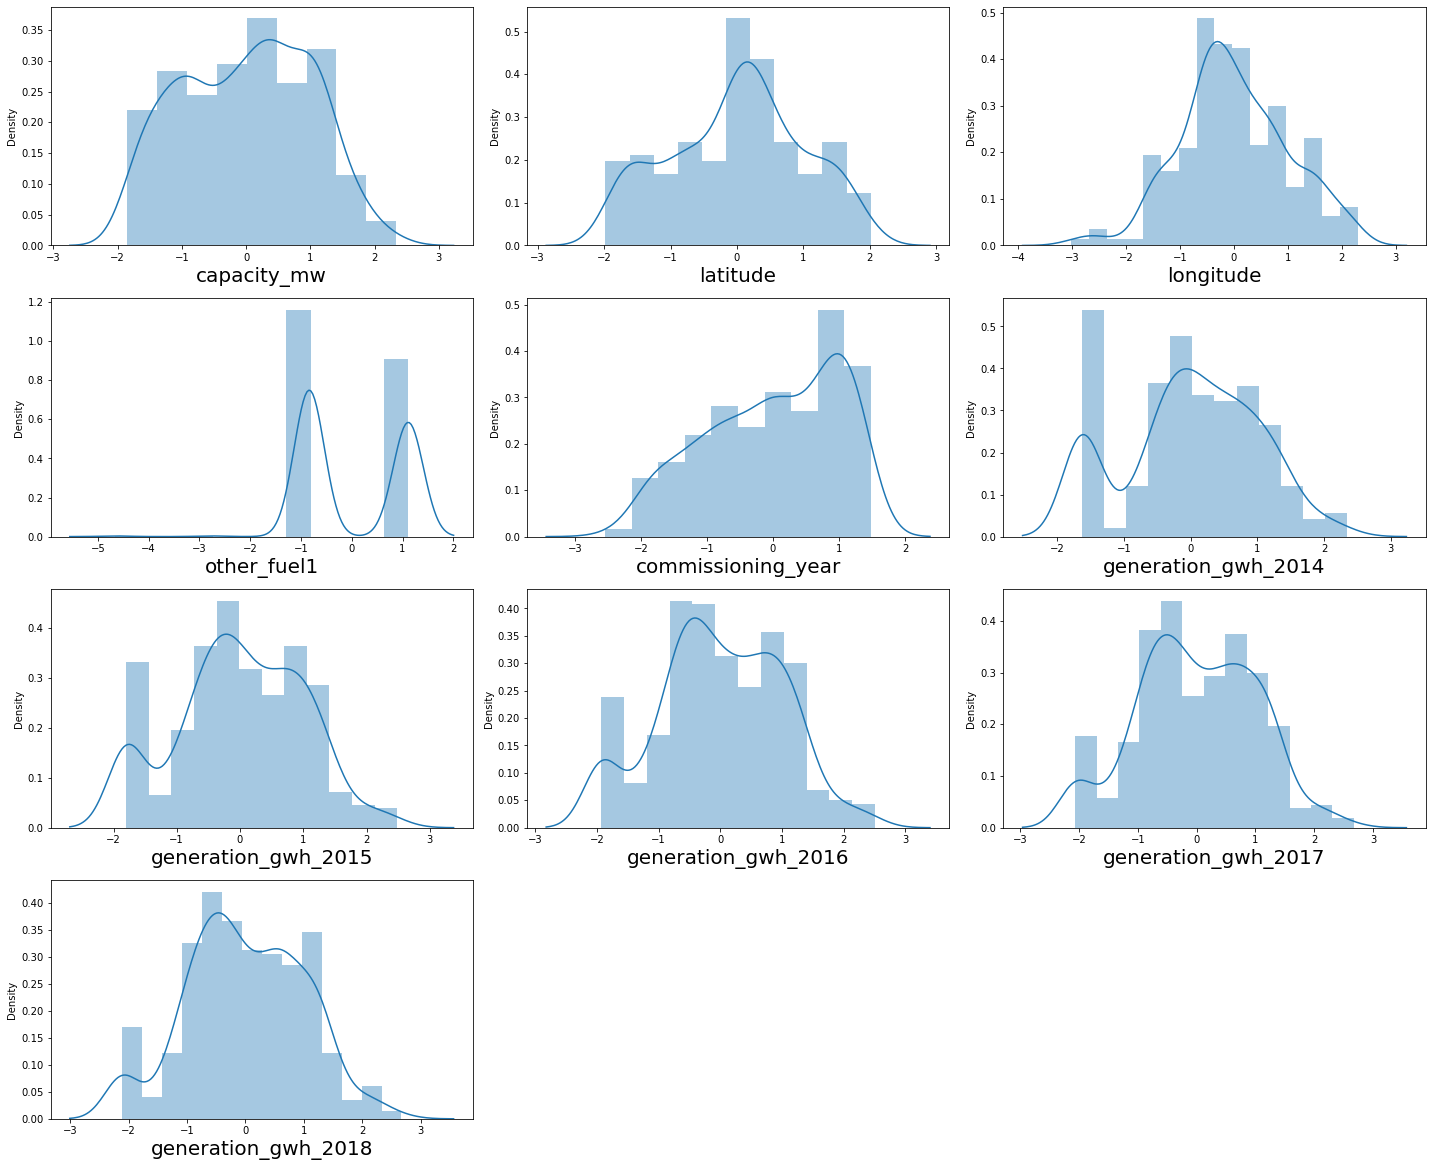

In [92]:
#Visualise the distribution of data in the feature columns(DISTRIBUTION PLOT)

plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in X:
    if plotnumber<=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [93]:
#Succesfully removed skewness form the dataset

In [94]:
#Data Scaling
scaler = StandardScaler()
X= scaler.fit_transform(X)

# APPLYING CLASSIFICATION MODELS & FINDING BEST FIT MODEL

In [95]:
#Finding best random_state
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

maxAccu=0 #maximum accuracy
maxRS=0 #best random state value for which max accuracy is acheived 
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is", maxAccu,"on Random State", maxRS)

Best accuracy is 0.9076923076923077 on Random State 152


In [96]:
#CREATING TRAIN-TEST SPLIT
x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.30, random_state=152)

In [97]:
results = pd.DataFrame()
model_name=[]
accuracy=[]
cvs=[]

In [98]:
#LOGISTIC REGRESSION
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
accuracy_LR = accuracy_score(y_test,y_pred)*100
scr = cross_val_score(LR,X,y,cv=5)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
model_name.append("Logistic Regression")
accuracy.append(accuracy_LR)
cvs.append(scr.mean())

[[65  0  0  0  0]
 [ 2  2  5  0  0]
 [ 0  2 50  0  0]
 [ 0  0  0  1  0]
 [ 0  2  1  0  0]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        65
         1.0       0.33      0.22      0.27         9
         2.0       0.89      0.96      0.93        52
         3.0       1.00      1.00      1.00         1
         4.0       0.00      0.00      0.00         3

    accuracy                           0.91       130
   macro avg       0.64      0.64      0.64       130
weighted avg       0.87      0.91      0.89       130



In [99]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
accuracy_dt = accuracy_score(y_test,y_pred_dt)*100
scr2 = cross_val_score(dt,X,y,cv=5)
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))
model_name.append("Decistion Tree Classifier")
accuracy.append(accuracy_dt)
cvs.append(scr2.mean())

[[60  5  0  0  0]
 [ 1  4  3  1  0]
 [ 0  7 45  0  0]
 [ 0  0  0  1  0]
 [ 0  2  0  0  1]]
              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95        65
         1.0       0.22      0.44      0.30         9
         2.0       0.94      0.87      0.90        52
         3.0       0.50      1.00      0.67         1
         4.0       1.00      0.33      0.50         3

    accuracy                           0.85       130
   macro avg       0.73      0.71      0.66       130
weighted avg       0.91      0.85      0.87       130



In [100]:
#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test,y_pred_rf)*100
scr3 = cross_val_score(rf,X,y,cv=5)
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))
model_name.append("Random Forest Classifier")
accuracy.append(accuracy_rf)
cvs.append(scr3.mean())

[[65  0  0  0  0]
 [ 1  4  4  0  0]
 [ 0  3 49  0  0]
 [ 0  0  0  1  0]
 [ 0  2  0  0  1]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        65
         1.0       0.44      0.44      0.44         9
         2.0       0.92      0.94      0.93        52
         3.0       1.00      1.00      1.00         1
         4.0       1.00      0.33      0.50         3

    accuracy                           0.92       130
   macro avg       0.87      0.74      0.77       130
weighted avg       0.92      0.92      0.92       130



In [101]:
#SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
accuracy_svc = accuracy_score(y_test,y_pred_svc)*100
scr4 = cross_val_score(svc,X,y,cv=5)
print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))
model_name.append("SVC")
accuracy.append(accuracy_svc)
cvs.append(scr4.mean())

[[65  0  0  0  0]
 [ 1  2  6  0  0]
 [ 0  0 52  0  0]
 [ 0  1  0  0  0]
 [ 0  3  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        65
         1.0       0.33      0.22      0.27         9
         2.0       0.90      1.00      0.95        52
         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         3

    accuracy                           0.92       130
   macro avg       0.44      0.44      0.44       130
weighted avg       0.87      0.92      0.89       130



In [102]:
cvs

[0.8538358727612938,
 0.8677358994921145,
 0.8886661320502538,
 0.8654637797380378]

In [103]:
results['Model Name'] = model_name
results['Accuracy'] = accuracy
results['Cross Value Score'] = cvs
results

,Model Name,Accuracy,Cross Value Score
0,Logistic Regression,90.769231,0.853836
1,Decistion Tree Classifier,85.384615,0.867736
2,Random Forest Classifier,92.307692,0.888666
3,SVC,91.538462,0.865464


In [104]:
#As per the above results, Random Forest Classifier is giving the best accuracy.

In [105]:
#Lets try to improve the accuracy score by using GridSearchCV over RF classifier

#Let's tune the parameter using GridSearchCV
#RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=41)
clf= RandomForestClassifier()
params = { 'n_estimators': [13,15],
          'criterion': ['entropy', 'gini'],
          'max_depth': [10,15],
          'min_samples_split':[10,11],
          'min_samples_leaf':[5,6]
         }
grid=GridSearchCV(clf,param_grid=params)
grid.fit(x_train,y_train)
print('best_params=>', grid.best_params_)
clf=grid.best_estimator_
clf.fit(x_train,y_train)
y_pred_gscv=clf.predict(x_test)
rf_conf_mat=confusion_matrix(y_test,y_pred_gscv)
print('\n Conf Mat =>''\n', rf_conf_mat)
print('\n' ' Accuracy rf Normal =>', accuracy_score(y_test,y_pred_gscv))

report = classification_report(y_test,y_pred_gscv)
print(report)

# Concluding Remarks

# Since Random Forest Classification model has the best score, we will finalise the model.

In [107]:
import joblib
joblib.dump(clf,'Primary_Fuel_PowerPlant.obj')

['Primary_Fuel_PowerPlant.obj']

# TARGET-2 => CAPACITY capacity_mw

In [108]:
#we will now predict the capacity_mw as a target

In [109]:
#Correlation with the target column
corr_mat=np.abs(df.corr())
corr_mat['capacity_mw'].sort_values(ascending=False)

capacity_mw            1.000000
generation_gwh_2018    0.904861
generation_gwh_2017    0.888268
generation_gwh_2016    0.868373
generation_gwh_2015    0.822972
generation_gwh_2014    0.775737
other_fuel1            0.505240
primary_fuel           0.492296
commissioning_year     0.293098
latitude               0.028921
longitude              0.026441
Name: capacity_mw, dtype: float64

In [110]:
#There seems to be high correlation between the yearly power generation features and the target

# DIVIDE DATA INTO FEATURES & LABEL

In [111]:
#dividing the columns into feature and label
X = df.drop(columns=['capacity_mw'])
y = df['capacity_mw']

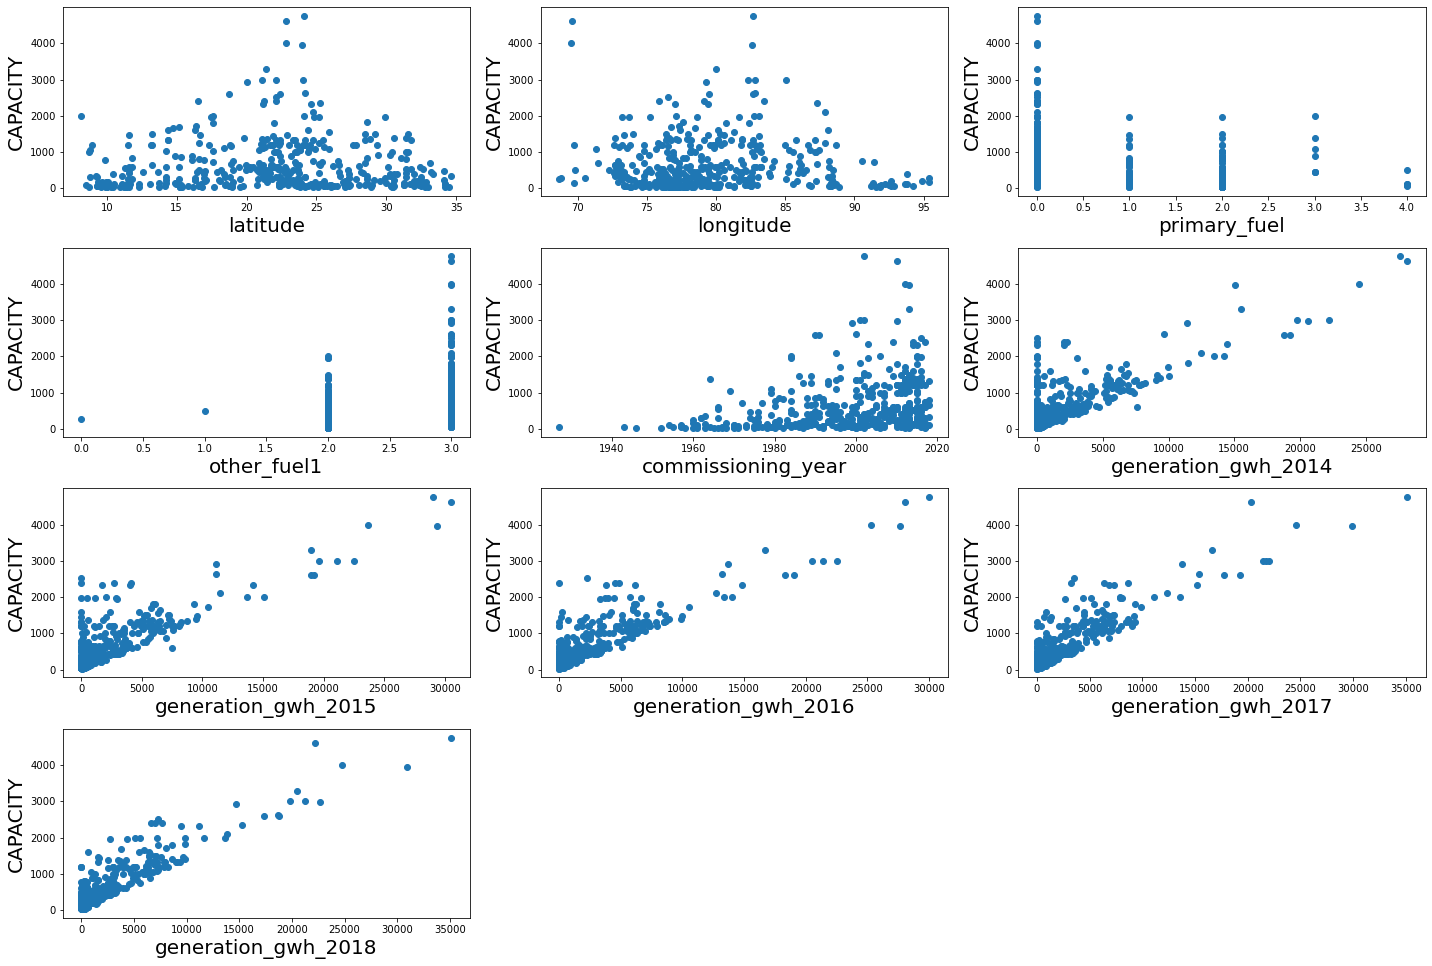

In [112]:
#Visualizing relatinship between feature and label (SCATTER PLOT)

plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=30: 
        ax=plt.subplot(10,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('CAPACITY', fontsize=20)
    plotnumber+=1
plt.tight_layout()


# OBSERVATIONS - FEATURE VS LABEL

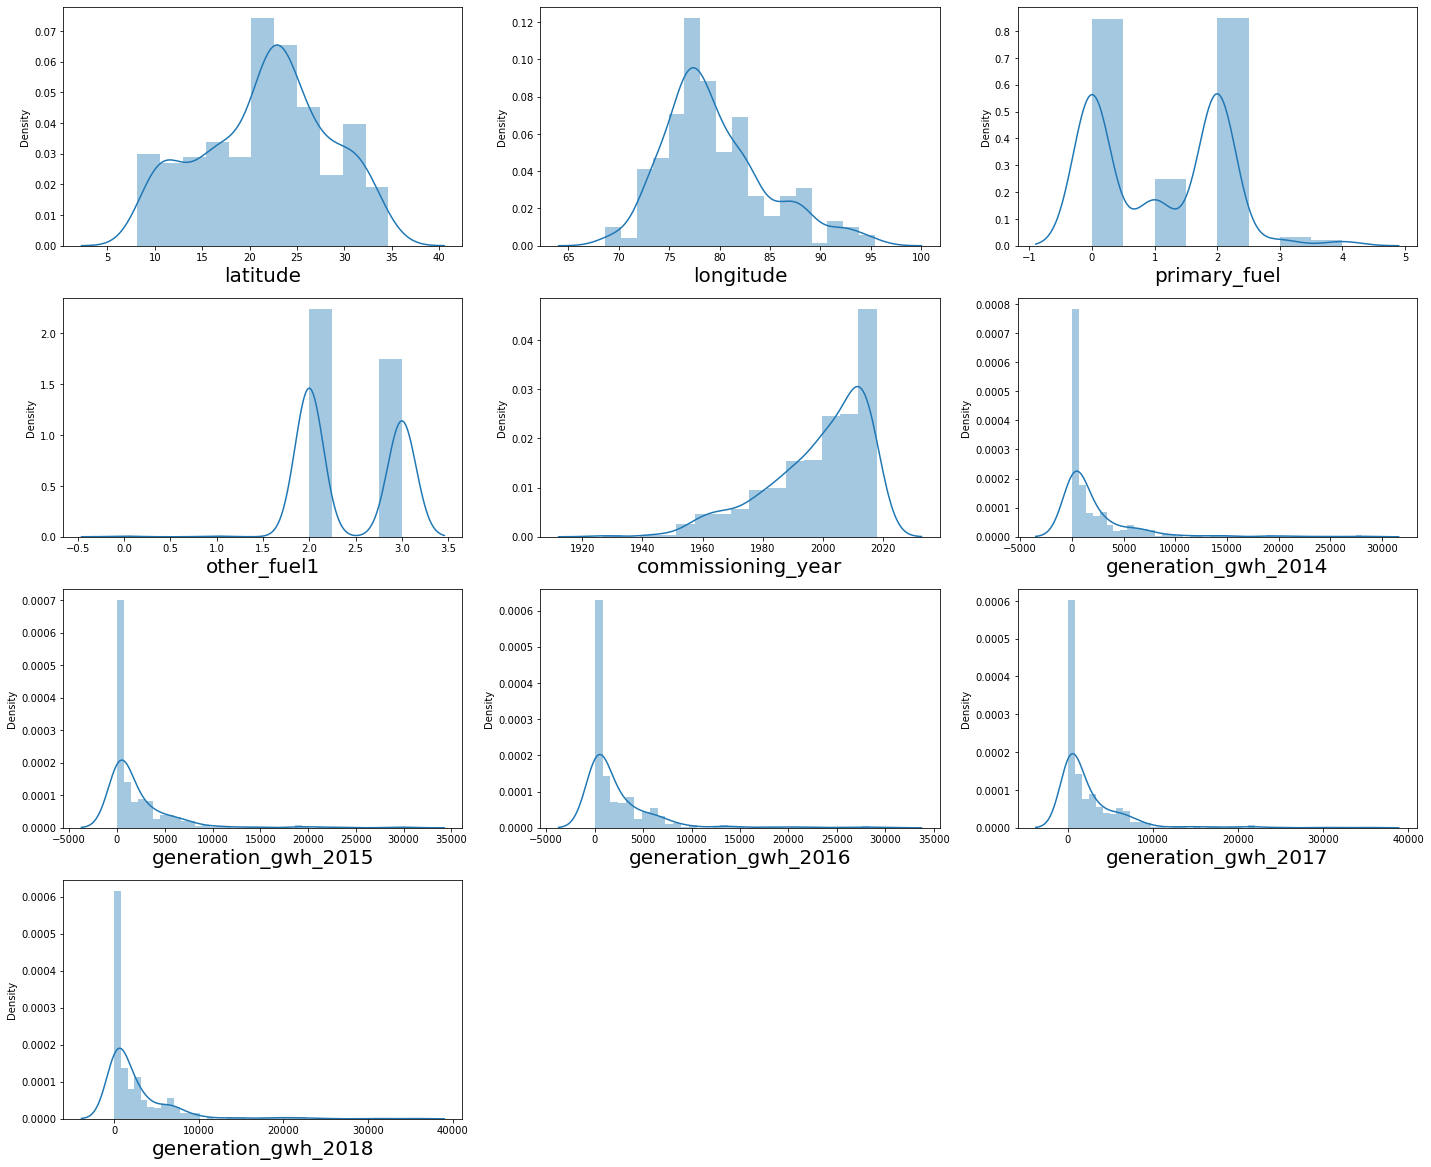

In [113]:
#Visualise the distribution of data in the feature columns(DISTRIBUTION PLOT)

plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in X:
    if plotnumber<=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [114]:
# OBSERVATIONS - FEATURE DISTRIBUTION

# REMOVING SKEWNESS & OUTLIERS FROM THE DATASET

In [115]:
#Checking skewness of the features
X.skew().sort_values(ascending=False)

generation_gwh_2015    3.699520
generation_gwh_2017    3.536449
generation_gwh_2016    3.499128
generation_gwh_2014    3.467661
generation_gwh_2018    3.422547
longitude              0.814927
primary_fuel           0.230803
other_fuel1           -0.023353
latitude              -0.186236
commissioning_year    -1.065389
dtype: float64

In [116]:
#all the generation years features are highly skewed

In [117]:
#We can see skewness in few of our columns, we will remove the skewness using power_transform function
from sklearn.preprocessing import power_transform
X_new = power_transform(X)
X=pd.DataFrame(X_new,columns=X.columns)
X.skew().sort_values(ascending=False) #validating that the skewness is removed

longitude              0.013035
other_fuel1           -0.011306
primary_fuel          -0.055479
generation_gwh_2018   -0.059115
generation_gwh_2017   -0.073433
generation_gwh_2016   -0.092086
latitude              -0.111293
generation_gwh_2015   -0.117601
generation_gwh_2014   -0.163368
commissioning_year    -0.395531
dtype: float64

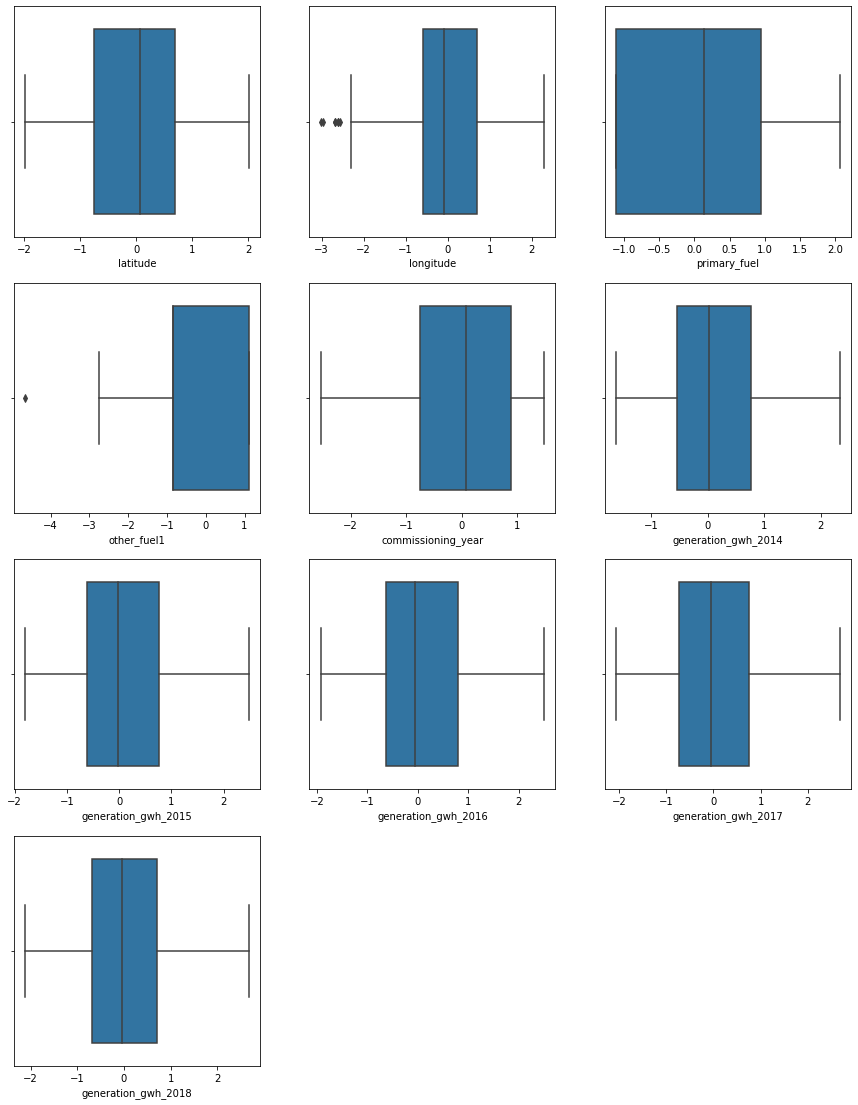

In [118]:
#Visualizing the outliers using BOXPLOT

plt.figure(figsize=(15,50))
graph=1

for column in X:
    if graph<=30: 
        ax=plt.subplot(10,3,graph)
        sns.boxplot(X[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [119]:
# to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(X))
z.shape

threshold=3
print(np.where(z>3))

X_new=X[(z<3).all(axis=1)]
print("total_dropped_rows",X.shape[0]-X_new.shape[0])

y=y[(z<3).all(axis=1)]
y.shape

(array([  2, 388], dtype=int64), array([1, 3], dtype=int64))
total_dropped_rows 2


(429,)

In [120]:
X = X_new

In [121]:
X.shape

(429, 10)

In [122]:
y.shape

(429,)

In [123]:
#Data Scaling
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [124]:
#Finding best random_state
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
maxAccu=0 #maximum accuracy
maxRS=0 #best random state value for which max accuracy is acheived 
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc = r2_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is", maxAccu,"on Random State", maxRS)

Best accuracy is 0.714040269301207 on Random State 18


In [125]:
#Train Test Split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=18)

In [126]:
model_name=[]
r2_scores=[]
rmse_value=[]
cvs=[]

R2Score : 62.170320337978694
MAE: 334.78738223306146
MSE: 254812.36967912182
RMSE: 504.78943102953514


Text(0, 0.5, 'Predicted Y')

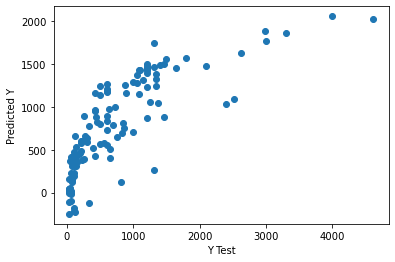

In [127]:
#Linear Regression
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2score=r2_score(y_test,y_pred)*100
print("R2Score :",r2score)
scr = cross_val_score(lr,X,y,cv=5)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )
model_name.append('Linear Regression')
r2_scores.append(r2score)
rmse_value.append(rmse)
cvs.append(scr.mean())
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

R2Score: 67.47533011262306
MAE: 275.92545736434107
MSE: 219078.99514555038
RMSE: 468.05875180958895


Text(0, 0.5, 'Predicted Y')

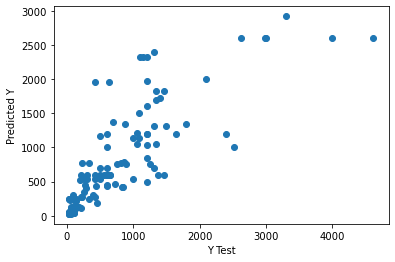

In [128]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)
r2score=r2_score(y_test,y_pred)*100
scr2 = cross_val_score(dtr,X,y,cv=5)
print("R2Score:", r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )
model_name.append('Decision Tree Regressor')
r2_scores.append(r2score)
rmse_value.append(rmse)
cvs.append(scr2.mean())
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

R2Score:  85.14616179608223
MAE: 207.66117806201552
MSE: 100052.17451974377
RMSE: 316.3102504183887


Text(0, 0.5, 'Predicted Y')

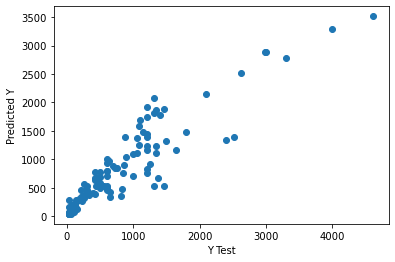

In [129]:
#RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
y_pred=rdr.predict(x_test)
r2score=r2_score(y_test,y_pred)*100
scr3 = cross_val_score(rdr,X,y,cv=5)
print("R2Score: ", r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )
model_name.append('Random Forest Regressor')
r2_scores.append(r2score)
rmse_value.append(rmse)
cvs.append(scr3.mean())
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

R2 Score:  -12.005242426713458
MAE: 542.5926990630996
MSE: 754442.5830253093
RMSE: 868.5865431983789


Text(0, 0.5, 'Predicted Y')

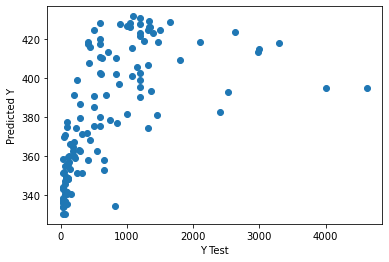

In [130]:
#SVR
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)
r2score=r2_score(y_test,y_pred)*100
print("R2 Score: ", r2score)
scr4 = cross_val_score(svr,X,y,cv=5)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )
model_name.append('SVR')
r2_scores.append(r2score)
rmse_value.append(rmse)
cvs.append(scr4.mean())
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

R2 Score:  81.16303566339036
MAE: 291.1306175826604
MSE: 126881.63270363107
RMSE: 356.20448158835825


Text(0, 0.5, 'Predicted Y')

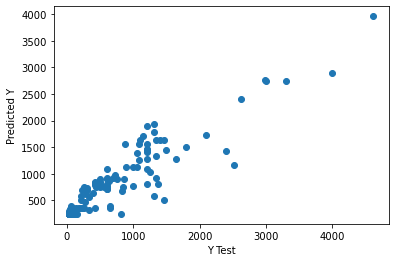

In [131]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)
r2score=r2_score(y_test,y_pred)*100
print("R2 Score: ", r2score)
scr5 = cross_val_score(ada,X,y,cv=5)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )
model_name.append('ADA Boost')
r2_scores.append(r2score)
rmse_value.append(rmse)
cvs.append(scr5.mean())
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

R2 Score:  84.59992485684013
MAE: 207.5823732497341
MSE: 103731.50593724674
RMSE: 322.0737585355981


Text(0, 0.5, 'Predicted Y')

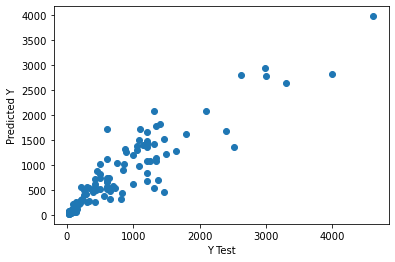

In [132]:
#XGB
import xgboost as xgb
xgb = xgb.XGBRegressor()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
r2score=r2_score(y_test,y_pred)*100
print("R2 Score: ",r2score)
scr6 = cross_val_score(xgb,X,y,cv=5)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )
model_name.append('XGBoost')
r2_scores.append(r2score)
rmse_value.append(rmse)
cvs.append(scr6.mean())
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [140]:
import pandas as pd
Regression_Scores = pd.DataFrame()
Regression_Scores['Model Name']= model_name
Regression_Scores['r2 Score']=r2_scores
Regression_Scores['RMSE ']=rmse_value
Regression_Scores['Cross Val Score']=cvs
Regression_Scores

,Model Name,r2 Score,RMSE,Cross Val Score
0,Linear Regression,62.170320,504.789431,0.574492
1,Decision Tree Regressor,67.475330,468.058752,0.680008
2,Random Forest Regressor,85.146162,316.310250,0.842611
3,SVR,-12.005242,868.586543,-0.048362
4,ADA Boost,81.163036,356.204482,0.782438
5,XGBoost,84.599925,322.073759,0.823259


In [141]:
#R2 Score is the highest (85.14) and RMSE value is the loweest (316.31) for Random Forest Regression, hence we will continue with Random Forest Regression model

,Y Test,Y Pred
104,60.0,53.41800
7,1350.0,1115.40560
322,300.0,451.43889
236,750.0,838.41880
164,100.0,71.01200


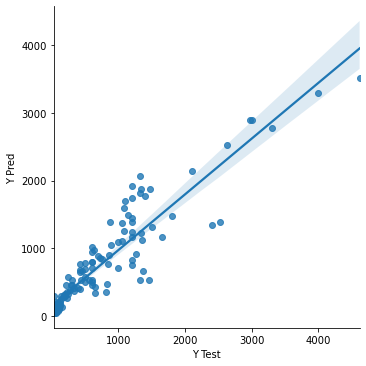

In [136]:
y_pred=rdr.predict(x_test)
data = pd.DataFrame({'Y Test':y_test , 'Y Pred':y_pred},columns=['Y Test','Y Pred'])
sns.lmplot(x='Y Test',y='Y Pred',data=data,palette='rainbow')
data.head()

In [137]:
parameters = {'criterion':['mse','mae'], 'max_features':["auto","sqrt","log2"]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [138]:
rf = RandomForestRegressor(criterion="mae",max_features="sqrt")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9774976618729353

In [139]:
y_pred=rf.predict(x_test)
rfs = r2_score(y_test,y_pred)
print("r2_score:",rfs*100)
rfscore = cross_val_score(rf,X,y,cv=5)
rfc=rfscore.mean()
print("Cross val score:",rfc*100)

r2_score: 86.25358000228513
Cross val score: 85.31871915133982


# Concluding Remarks

# Since Random Forest Regression model has the best score, we will finalise the model.

In [ ]:
#SAVING THE MODEL IN PICKLE FORMAT
#PICKELING OF A FILE OR SERIALIZATION OF A FILE
#saving the model to the local file system
filename = 'Capacity_PowerPlant.pickle'
pickle.dump(rf, open(filename, 'wb'))